In [117]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scienceplots
plt.style.use(['science','notebook'])

from scipy.stats import rv_continuous

# Traini plots

This Jupyter notebook recreates Figs. 2 and 3 of [Traini and Blaizot](https://doi.org/10.1140/epjc/s10052-019-6826-0). The basic idea is as follows:

1. Randomly generate three pairs of numbers $(x_{c, i}, y_{c, i})$ sampled using the random distribution in Eq. (9) of the paper, but instead of using $B_q$, use $B_{qc}$:

$$ T_{qc}(x_c, y_c) = \frac1{2\pi B_{qc}} e^{-(x_c^2 + y_c^2) / (2 B_{qc})}$$

These numbers will be the 3 centers of the hotspots.

2. Now that you have three pairs of numbers $(x_{c, i}, y_{c, i})$, plot Eqs. (8)-(9) of the paper with $N_q = 3$ and now using $B_{q}$, i.e., plot

$$ T(x, y) = \frac13 \bigg(\frac1{2\pi B_{q}} e^{-[(x - x_{c, 1})^2 + (y - y_{c, 1})^2] / (2 B_{q})} + \frac1{2\pi B_{q}} e^{-[(x - x_{c, 2})^2 + (y - y_{c, 2})^2] / (2 B_{q})} + \frac1{2\pi B_{q}} e^{-[(x - x_{c, 3})^2 + (y - y_{c, 3})^2] / (2 B_{q})}\bigg) $$

Depending on the parameters $B_q$ and $B_{qc}$, you should get something similar to either Fig. 2 or Fig. 3 of the paper.

To recreate Fig. 6 of the paper, you only have to modify the distribution in step 1 to Eq. (19) of the paper:

$$ \begin{aligned}
T_{2 h o}(\mathbf{b})= & \frac{\mathscr{N}_u}{\mathscr{N}_u+\mathscr{N}_d} \frac{1}{2 \pi B_u} e^{-\mathbf{b}^2 /\left(2 B_u\right)} \\
& +\frac{\mathscr{N}_d}{\mathscr{N}_u+\mathscr{N}_d} \frac{1}{2 \pi B_d} e^{-\mathbf{b}^2 /\left(2 B_d\right)},
\end{aligned}$$

with $\mathbf{b} = (x_c, y_c)$.

If the distribution is well-known enough, for example a gaussian (or normal) distribution, then you can use `numpy` to generate the random numbers for you.

`np.random.multivariate_normal(mean, cov, N)`

The `mean` and the `cov` are the mean and the covariance matrix of the multivariate normal distribution, while `N` is the number of points you want to generate. See the [multivariate normal distribution wiki page](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) to know what the covariance matrix means. Also see the [numpy multivariate normal documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) for more information.

For distributions that are not well-known, one can use techniques such as [inversion sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) (only for univariate distributions), or [rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling) or Markov chain Monte Carlo methods such as the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm).

# Mantysaari model

Here we plot Figs. 2 and 3 of the paper. The distribution they use to sample the centers of the hotspots is given in Eq.(9) of the paper:

$$ T_{qc}(x_c, y_c) = \frac1{2\pi B_{qc}} e^{-(x_c^2 + y_c^2) / (2 B_{qc})}$$

We can easily sample from this distribution using `np.random.multivariate_normal(mean, cov, N)`.

In [115]:
# Defines the Gaussian function that we will be plotting later.
def gauss(x, y, mx, my, B):
    pow = - ((x - mx)**2 + (y - my)**2) / (2 * B)
    return np.exp(pow) / (2 * np.pi * B)

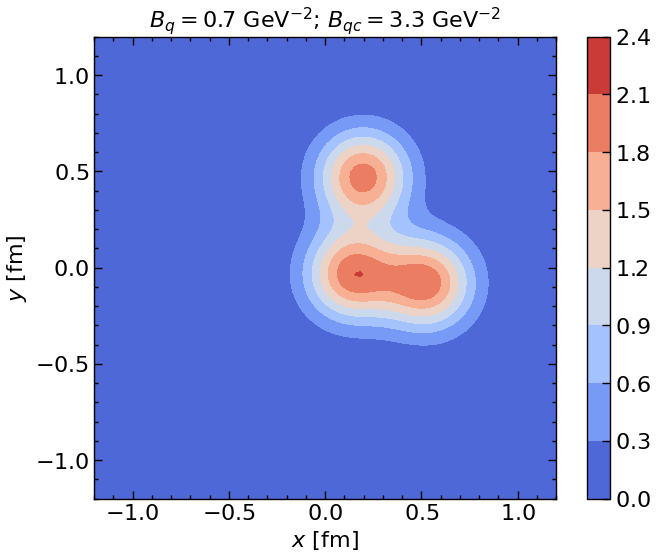

In [153]:
# Defines the parameters Bq and Bqc in units of GeV^-2 and converts them to units of fm^2
BqcGeV = 3.3
BqGeV = 0.7
Bqcfm = BqcGeV / (5.07**2)
Bqfm = BqGeV / (5.07**2)

# Generates three pairs of numbers (xc, yc) using a Gaussian distribution
mean = [0, 0]
cov = [[Bqcfm, 0], [0, Bqcfm]]
xc, yc = np.random.multivariate_normal(mean, cov, 3).T

# Generates (x, y, z) points to be plotted
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
xv, yv = np.meshgrid(x, y)
zv = (gauss(xv, yv, xc[0], yc[0], Bqfm) + gauss(xv, yv, xc[1], yc[1], Bqfm) + gauss(xv, yv, xc[2], yc[2], Bqfm)) / 3

plot = plt.contourf(xv, yv, zv, cmap=cm.coolwarm)
plt.colorbar(plot)
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.xlabel('$x$ [fm]')
plt.ylabel('$y$ [fm]')
plt.title(r'$B_q = $' + str(BqGeV) + r' GeV$^{-2}$; $B_{qc} = $' + str(BqcGeV) + r' GeV$^{-2}$')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

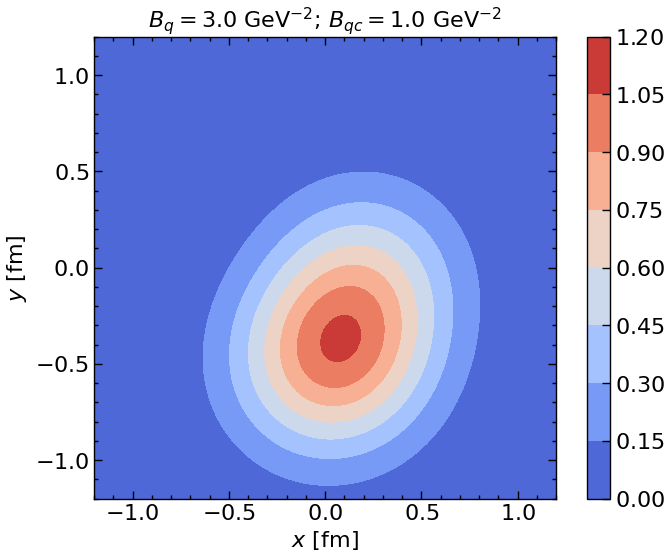

In [147]:
# Defines the parameters Bq and Bqc in units of GeV^-2 and converts them to units of fm^2
BqcGeV = 1.0
BqGeV = 3.0
Bqcfm = BqcGeV / (5.07**2)
Bqfm = BqGeV / (5.07**2)

# Generates three pairs of numbers (xc, yc) using a Gaussian distribution
mean = [0, 0]
cov = [[Bqcfm, 0], [0, Bqcfm]]
xc, yc = np.random.multivariate_normal(mean, cov, 3).T

# Generates (x, y, z) points to be plotted
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
xv, yv = np.meshgrid(x, y)
zv = (gauss(xv, yv, xc[0], yc[0], Bqfm) + gauss(xv, yv, xc[1], yc[1], Bqfm) + gauss(xv, yv, xc[2], yc[2], Bqfm)) / 3

plot = plt.contourf(xv, yv, zv, cmap=cm.coolwarm)
plt.colorbar(plot)
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.xlabel('$x$ [fm]')
plt.ylabel('$y$ [fm]')
plt.title(r'$B_q = $' + str(BqGeV) + r' GeV$^{-2}$; $B_{qc} = $' + str(BqcGeV) + r' GeV$^{-2}$')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

# Traini Blaizot (Isgur, Karl) Model

Here we plot Fig. 6 of the paper. In this case, the distribution they use to sample the centers of the hotspots are given by Eq. (19) of the paper

$$ T_{2 h o}(\mathbf{b})=  \frac{\mathscr{N}_u}{\mathscr{N}_u+\mathscr{N}_d} \frac{1}{2 \pi B_u} e^{-\mathbf{b}^2 /\left(2 B_u\right)} +\frac{\mathscr{N}_d}{\mathscr{N}_u+\mathscr{N}_d} \frac{1}{2 \pi B_d} e^{-\mathbf{b}^2 /\left(2 B_d\right)} $$

with

$$ \frac1{2B_u} = 2.67 \text{ fm}^{-2}, \quad \frac1{2B_d} = 2.99 \text{ fm}^{-2} $$

or $B_u = 4.8$ GeV $^{-2}$ and $B_d = 4.3$ GeV $^{-2}$.

Note that for any $\mathscr{N}_{u,d}$, $\int d^{2} b\, T_{2 h o}(\mathbf{b}) = 1$. I think we can just choose any $\mathscr{N}_{u,d}$ that satisfies $\mathscr{N}_u + \mathscr{N}_d = 3$. In this case, we choose $\mathscr{N}_u = 2$ and $\mathscr{N}_d = 1$ which corresponds to the quantum numbers of the proton. Before doing anything, let's plot this distribution.

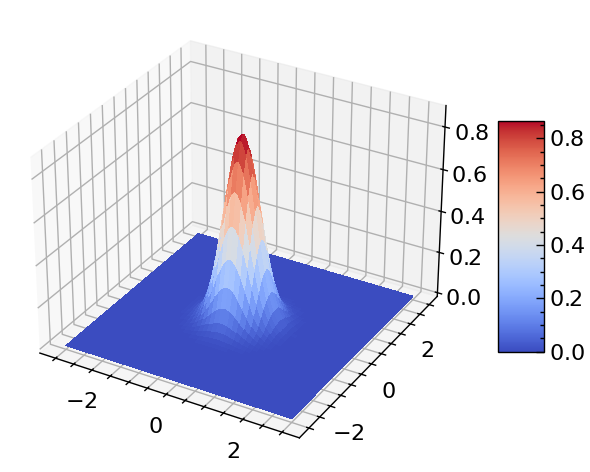

In [127]:
# Parameters
BuGeV = 4.8
BdGeV = 4.3
Bufm = BuGeV / (5.07**2)
Bdfm = BdGeV / (5.07**2)

# Make data
pmax = 3
Npts = 100
x = np.linspace(-pmax, pmax, Npts)
y = np.linspace(-pmax, pmax, Npts)
xv, yv = np.meshgrid(x, y)
zv = (2 * gauss(xv, yv, 0, 0, Bufm) + gauss(xv, yv, 0, 0, Bdfm)) / 3

# Plot surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

We will sample from this distribution using the **rejection sampling** technique. Imagine the picture above as an actual thing: a surface contained inside a box of dimensions $x, y \in [-2, 2]$ and $z \in [0, 1]$. The idea of **rejection sampling** is that we "throw darts" into the 3d box above and "see where it lands" if we imagine the dart can land in a 3d location $(x, y, z)$. 
- If it lands below the surface, then we accept it as a sample.
- If it lands above the surface, then we reject it and throw another dart.

Then, we repeat this procedure until we get the number of samples that we want. Let's try to implement this idea below.

In [141]:
# Function that generate N (x, y) points according to the 2ho distribution above
def generate2ho(N):
    # Parameters of the distribution
    BuGeV = 4.8
    BdGeV = 4.3
    Bufm = BuGeV / (5.07**2)
    Bdfm = BdGeV / (5.07**2)

    pmax = 3 # The max range that we sample our (x, y) points.
    
    out = []
    # Loop until we get N points
    iter = 0
    while iter < N:
        # Generate uniform random point in 3d space
        xtest, ytest = np.random.default_rng().uniform(-pmax, pmax, 2)
        ztest = np.random.default_rng().uniform(0, 1, 1)
        # The z value corresponding to the randomly generated (xtest, ytest)
        zcond = (2 * gauss(xtest, ytest, 0, 0, Bufm) + gauss(xtest, ytest, 0, 0, Bdfm)) / 3
        # Accepts if randomly generated ztest is under the curve
        if ztest < zcond:
            out.append([xtest, ytest])
            iter = iter + 1
    return np.array(out)

Now we repeat the same thing we did in the previous section, but use the function defined above to generate our random centers.

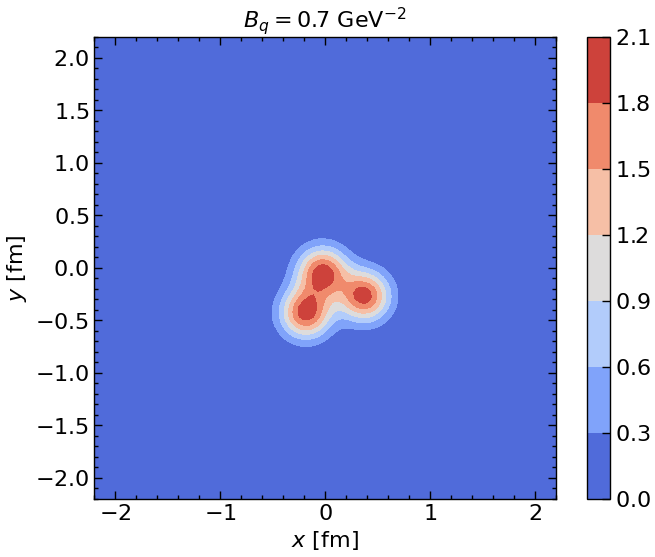

In [155]:
# Defines the parameter Bq in units of GeV^-2 and converts them to units of fm^2
BqGeV = 0.7
Bqfm = BqGeV / (5.07**2)

# Generates three pairs of numbers (xc, yc) using 2ho distribution
xc, yc = generate2ho(3).T

# Generates (x, y, z) points to be plotted
x = np.linspace(-2.2, 2.2, 100)
y = np.linspace(-2.2, 2.2, 100)
xv, yv = np.meshgrid(x, y)
zv = (gauss(xv, yv, xc[0], yc[0], Bqfm) + gauss(xv, yv, xc[1], yc[1], Bqfm) + gauss(xv, yv, xc[2], yc[2], Bqfm)) / 3

plot = plt.contourf(xv, yv, zv, cmap=cm.coolwarm)
plt.colorbar(plot)
plt.xlim([-2.2, 2.2])
plt.ylim([-2.2, 2.2])
plt.xlabel('$x$ [fm]')
plt.ylabel('$y$ [fm]')
plt.title(r'$B_q = $' + str(BqGeV) + r' GeV$^{-2}$')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()
